In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        dataset_directory = os.path.join(dirname, filename)
        print(dataset_directory)

/kaggle/input/diamonds/diamonds.csv


## Data Exploration
With the data already available from our Diamonds dataset, we will move forward to the data exploration stage of the project lifecycle to properly analyze the characteristics and content of the dataset that will assist us during our data processing/feature engineering

### Numerical Data Exploration

In [2]:
# Read dataset and convert into a DataFrame
dataframe = pd.read_csv(dataset_directory)

# Check characteristics/properties of DataFrame
print("Data Type: " + str(type(dataframe)))
print("Dataset Size: " + str(len(dataframe)))
print("Dataset Shape (Rows, Columns): " + str(dataframe.shape))

Data Type: <class 'pandas.core.frame.DataFrame'>
Dataset Size: 53940
Dataset Shape (Rows, Columns): (53940, 11)


In [3]:
# Visualize the first 5 columns of the dataset
dataframe.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Show data types for each columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
# Show statistical information of the dataset for numerical datatypes
dataframe.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# Show statistical information of the dataset for object datatypes
dataframe.describe(include=object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [7]:
# Show count of unique values for each object-type columns
object_columns = dataframe.select_dtypes(include=['object']).columns
for column in object_columns:
    print(dataframe[column].value_counts())

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [8]:
# Check if columns has missing values
dataframe.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Plot Visualization

In [9]:
# Import visualization modules/packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

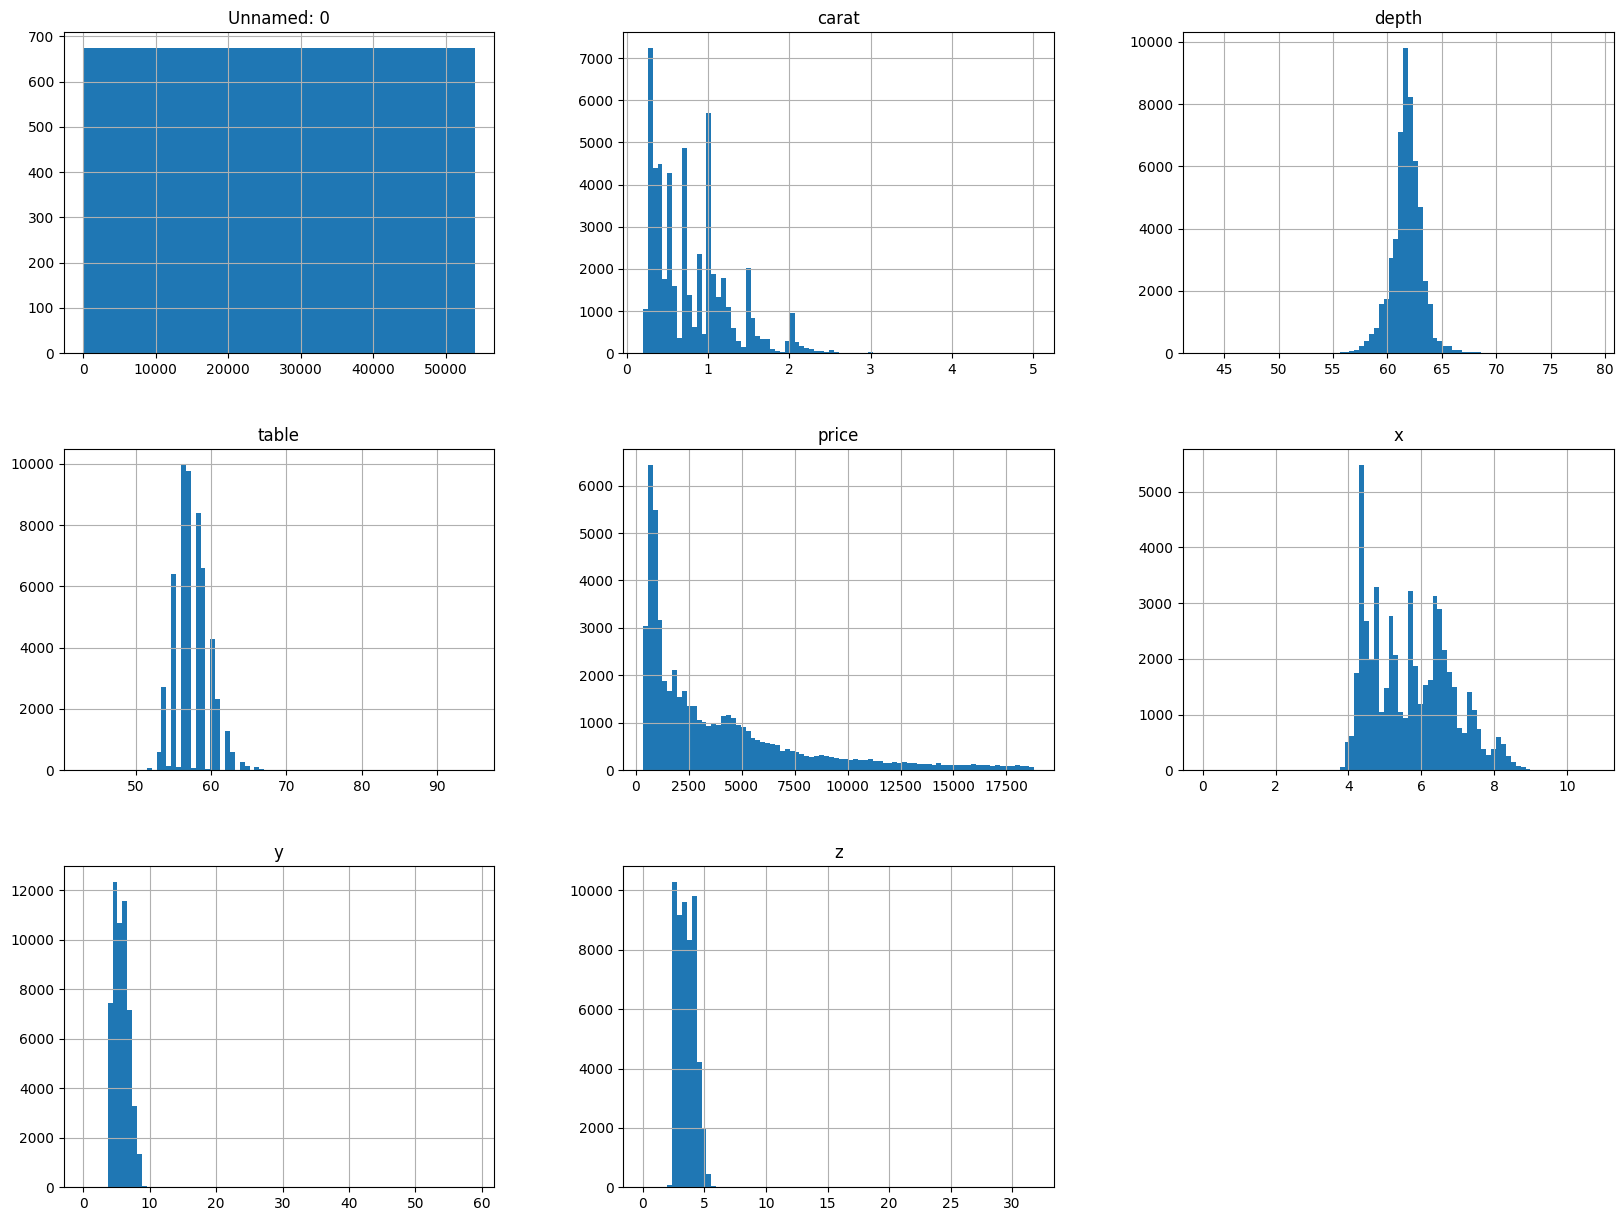

In [10]:
plots = dataframe.hist( bins = 80, figsize=(20, 15))

In [11]:
# Check correlation betwee numerical data
dataframe_numerics = dataframe.select_dtypes(include = (np.number))
corr = dataframe_numerics.corr()
print(corr)

            Unnamed: 0     carat     depth     table     price         x  \
Unnamed: 0    1.000000 -0.377983 -0.034800 -0.100830 -0.306873 -0.405440   
carat        -0.377983  1.000000  0.028224  0.181618  0.921591  0.975094   
depth        -0.034800  0.028224  1.000000 -0.295779 -0.010647 -0.025289   
table        -0.100830  0.181618 -0.295779  1.000000  0.127134  0.195344   
price        -0.306873  0.921591 -0.010647  0.127134  1.000000  0.884435   
x            -0.405440  0.975094 -0.025289  0.195344  0.884435  1.000000   
y            -0.395843  0.951722 -0.029341  0.183760  0.865421  0.974701   
z            -0.399208  0.953387  0.094924  0.150929  0.861249  0.970772   

                   y         z  
Unnamed: 0 -0.395843 -0.399208  
carat       0.951722  0.953387  
depth      -0.029341  0.094924  
table       0.183760  0.150929  
price       0.865421  0.861249  
x           0.974701  0.970772  
y           1.000000  0.952006  
z           0.952006  1.000000  


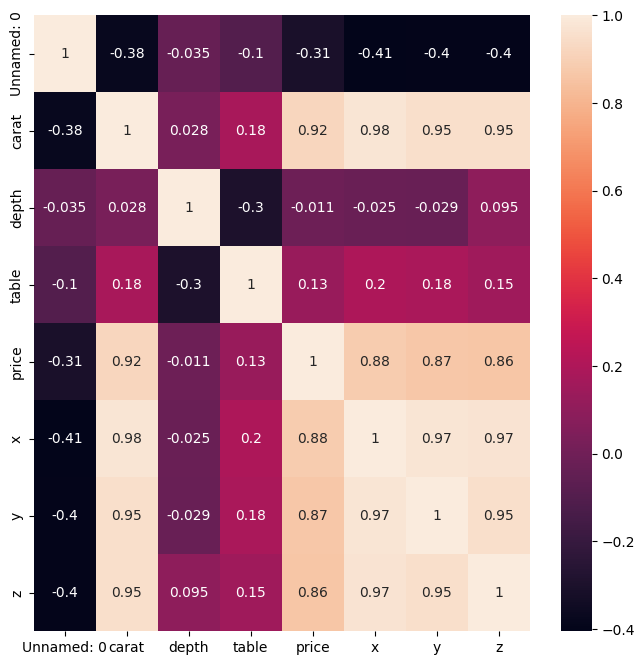

In [12]:
# Create heatmap to visualize correlation
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)
plt.show()